In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns                                     # density plots
import matplotlib.pyplot as plt                           # general plotting
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
input_data = pd.read_csv('Processed_Assen_RS_data.csv')

size = (172, 284)

In [ ]:
input_data

Unnamed: 0  Longitude   Latitude  Band1  Band2  Band3  Band4  Band5  \
0               0  27.564250 -25.105965    188    227    363    406    750   
1               1  27.564548 -25.105963    126    144    215    166    917   
2               2  27.564845 -25.105962    141    187    421    310   2263   
3               3  27.565143 -25.105961    111    170    402    291   2558   
4               4  27.565440 -25.105960    232    365    658    779   2409   
...           ...        ...        ...    ...    ...    ...    ...    ...   
48843       48843  27.647507 -25.151951    381    449    677    884   1931   
48844       48844  27.647804 -25.151950    408    483    720    996   1840   
48845       48845  27.648102 -25.151949    364    414    584    796   1464   
48846       48846  27.648399 -25.151947    387    415    565    745   1389   
48847       48847  27.648697 -25.151946    416    435    578    719   1445   

       Band6  Band7  
0        709    440  
1        479    232  
2        947    438  
3       1154    562  
4       2199   1319  
...      ...    ...  
48843   2451   1749  
48844   2544   2068  
48845   2274   2039  
48846   2199   1867  
48847   2133   1718  

[48848 rows x 10 columns]

In [ ]:
# We'll need some lists of similar types of metadata to make referencing the data easier
coord_names = ['Longitude', 'Latitude']
bands = ['Band1', 'Band2','Band3', 'Band4', 'Band5', 'Band6', 'Band7']


input_data['Latitude'] = pd.to_numeric(input_data['Latitude'], errors='coerce') #convert latitude to numeric values
input_data['Longitude'] = pd.to_numeric(input_data['Longitude'], errors='coerce') #convert longitude to numeric values



for band in bands:
    input_data[band] = np.abs(pd.to_numeric(input_data[band], errors='coerce')) #make all chemical composition to be numeric


input_data.describe() #print cleaned combined df

Unnamed: 0     Longitude      Latitude         Band1         Band2  \
count  48848.000000  48848.000000  48848.000000  48848.000000  48848.000000   
mean   24423.500000     27.606466    -25.128960    251.722547    316.526327   
std    14101.347312      0.024398      0.013452     94.493587    106.311331   
min        0.000000     27.564250    -25.152291      0.000000     62.000000   
25%    12211.750000     27.585356    -25.140607    186.000000    248.000000   
50%    24423.500000     27.606466    -25.128958    245.000000    312.000000   
75%    36635.250000     27.627580    -25.117309    312.000000    377.000000   
max    48847.000000     27.648697    -25.105620    968.000000   1171.000000   

              Band3         Band4         Band5         Band6         Band7  
count  48848.000000  48848.000000  48848.000000  48848.000000  48848.000000  
mean     509.547433    609.615419   1648.147539   1801.414490   1216.814609  
std      145.656643    238.682890    446.999961    469.584012    432.462650  
min      149.000000    121.000000    150.000000    141.000000    102.000000  
25%      436.000000    467.000000   1382.000000   1539.000000    937.750000  
50%      498.000000    577.000000   1585.000000   1830.000000   1196.000000  
75%      562.000000    706.000000   1865.000000   2070.000000   1454.000000  
max     1834.000000   2558.000000   5025.000000   4031.000000   3158.000000

**Basic Exploratory Data Analysis**

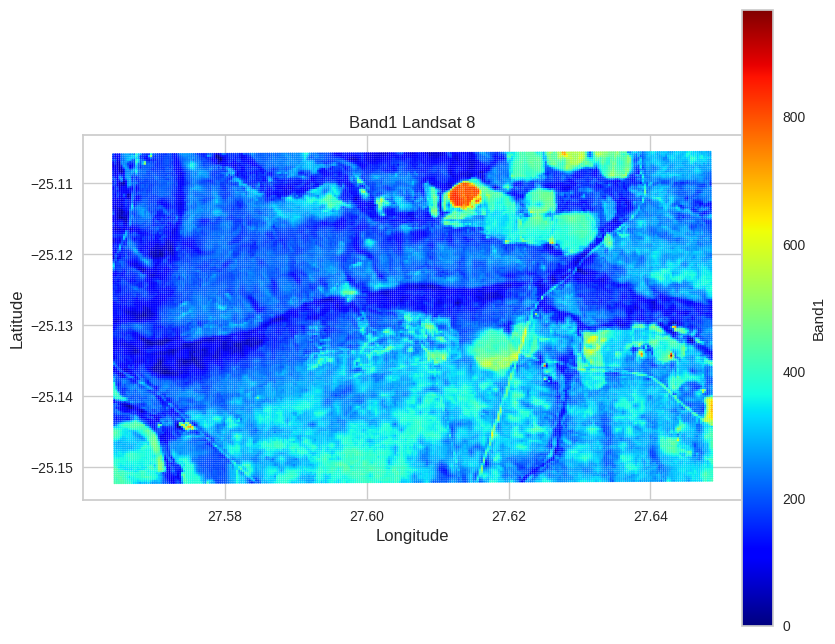

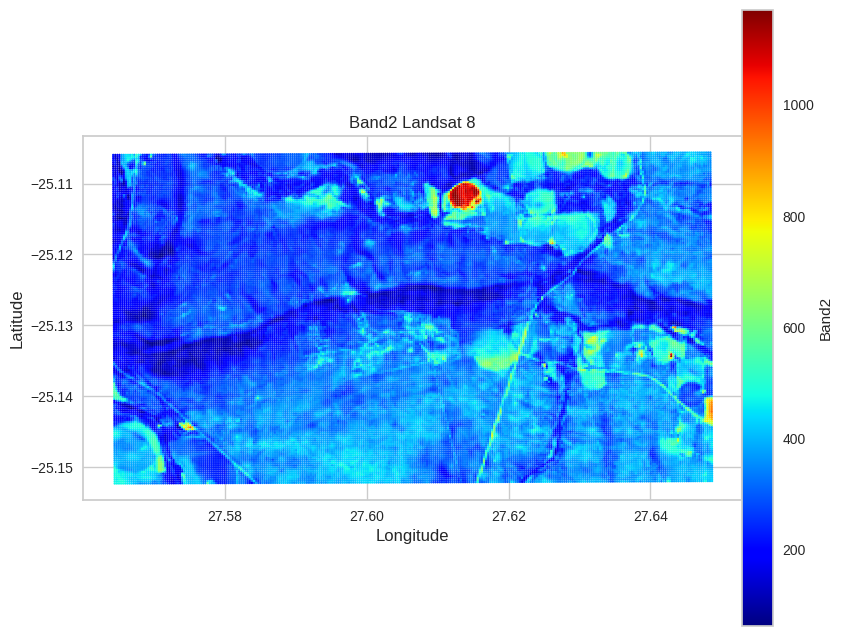

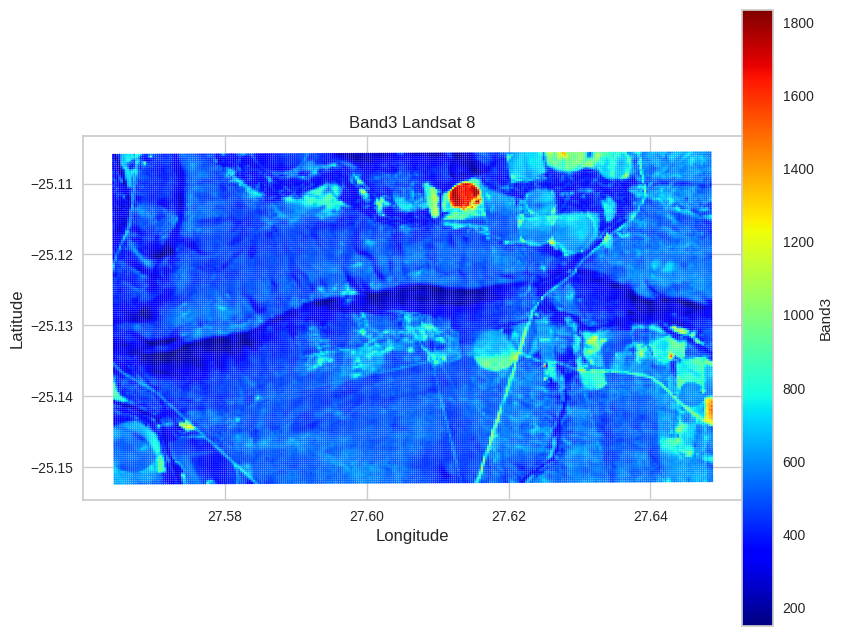

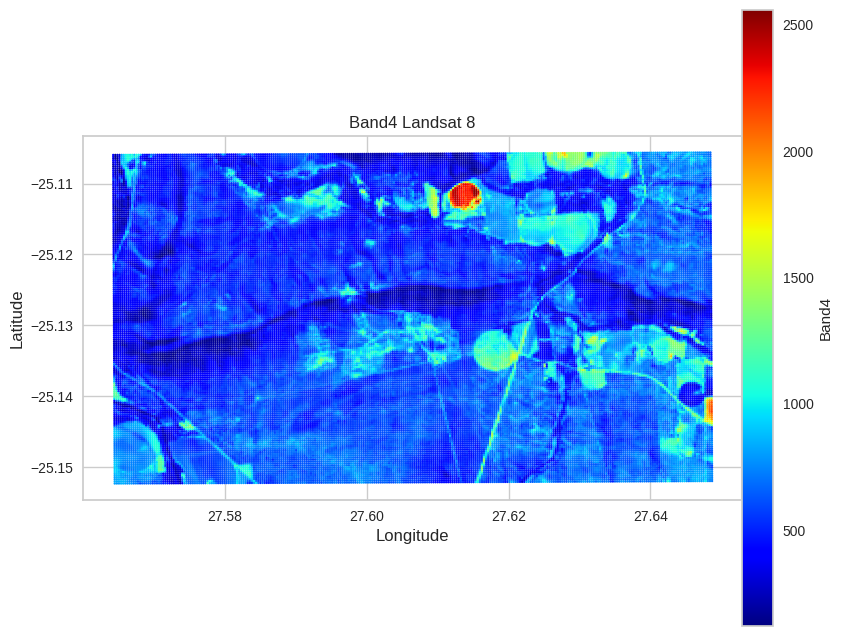

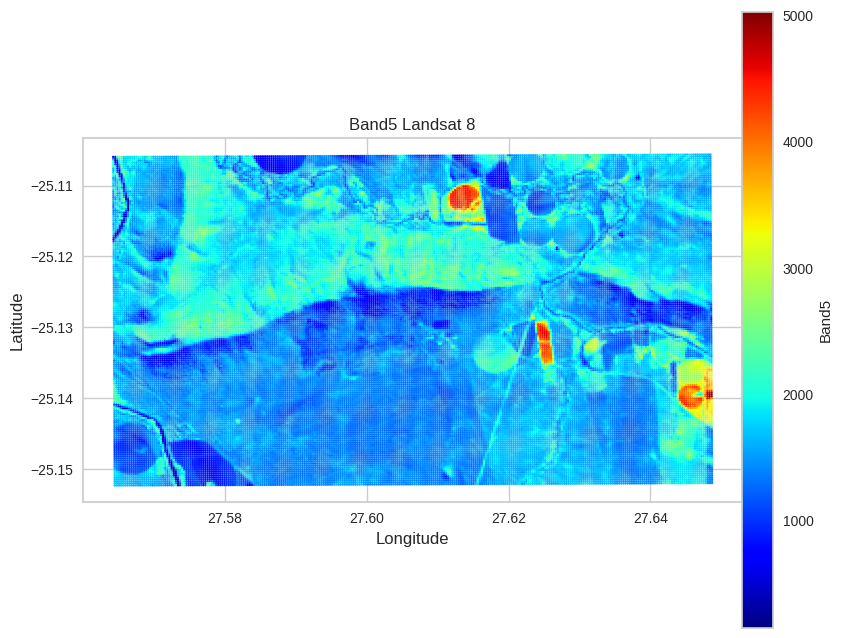

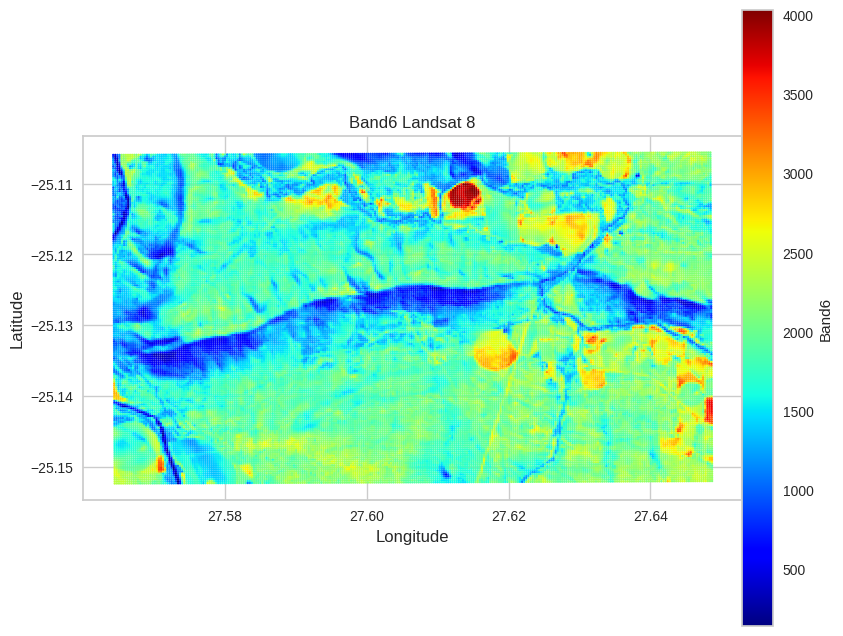

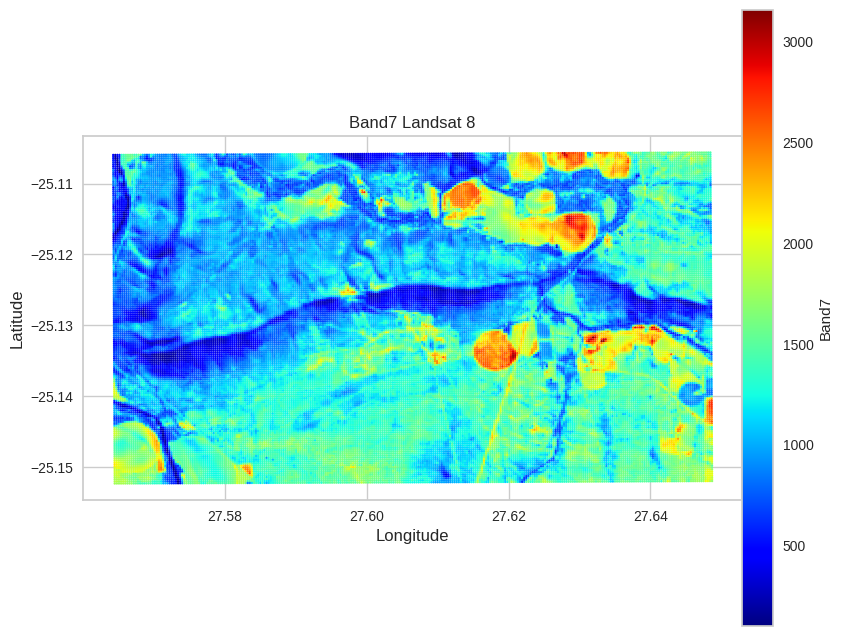

CPU times: user 5.44 s, sys: 589 ms, total: 6.03 s
Wall time: 5.9 s


In [ ]:
%%time
for Band in bands:

        fig = plt.figure(figsize = (10,8))
        ax = fig.add_subplot(111)

        ax.set_aspect('equal')
        ax.set_xlabel('Longitude', fontsize = 12)
        ax.set_ylabel('Latitude', fontsize = 12)
        ax.set_title(Band+' Landsat 8', fontsize = 12)

        colormap=plt.cm.get_cmap('jet',int((max(input_data[Band])-min(input_data[Band]))*20))




        scatter=ax.scatter(input_data.Longitude, input_data.Latitude, c = input_data[Band],
                           cmap = colormap, s=3,alpha=1.0, edgecolors='none', label='Landsat 8')

        #ax.text(27.597720,-25.125509,  'M', fontsize=10,color='purple',
                #bbox=dict(facecolor='white', alpha = 0.5, edgecolor='white', boxstyle='round'))

       # ax.text(27.590647,-25.127248,  'W', fontsize=10,color='purple',
                #bbox=dict(facecolor='white', alpha = 0.5, edgecolor='white', boxstyle='round'))

        #ax.text(27.607325,-25.124558,  'E', fontsize=10,color='purple',
                #bbox=dict(facecolor='white', alpha = 0.5, edgecolor='white', boxstyle='round'))

        #ax.text(27.60,-25.13,  'Main Orebody', fontsize=10,color='purple',
                #bbox=dict(facecolor='white', alpha = 0.5, edgecolor='white', boxstyle='round'))



        cbar=fig.colorbar(scatter, pad=-0.000)

        cbar.set_label(Band)
        ax.grid(True)
        plt.show()

**ASSIGNMNET 6**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

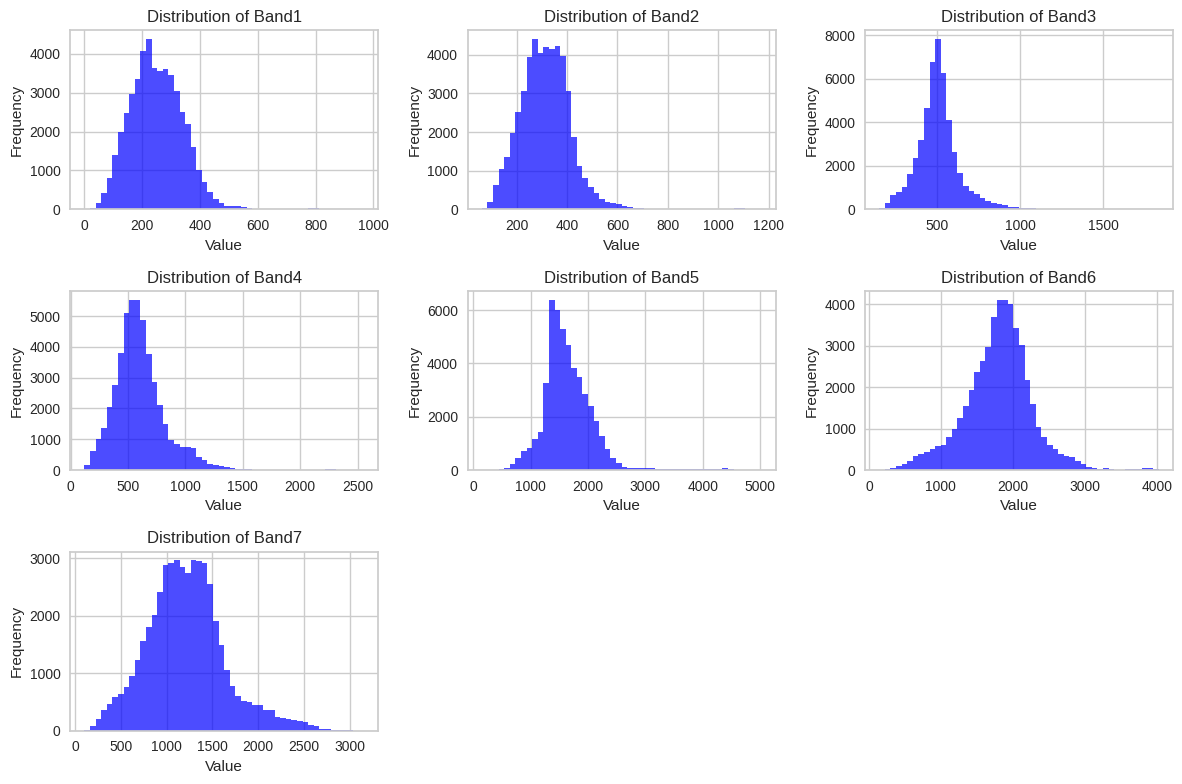

In [ ]:
plt.figure(figsize=(12, 8))
for i, band in enumerate(bands):
    plt.subplot(3, 3, i + 1)  # Adjust based on the number of bands
    plt.hist(input_data[band], bins=50, alpha=0.7, color='blue')
    plt.title(f'Distribution of {band}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

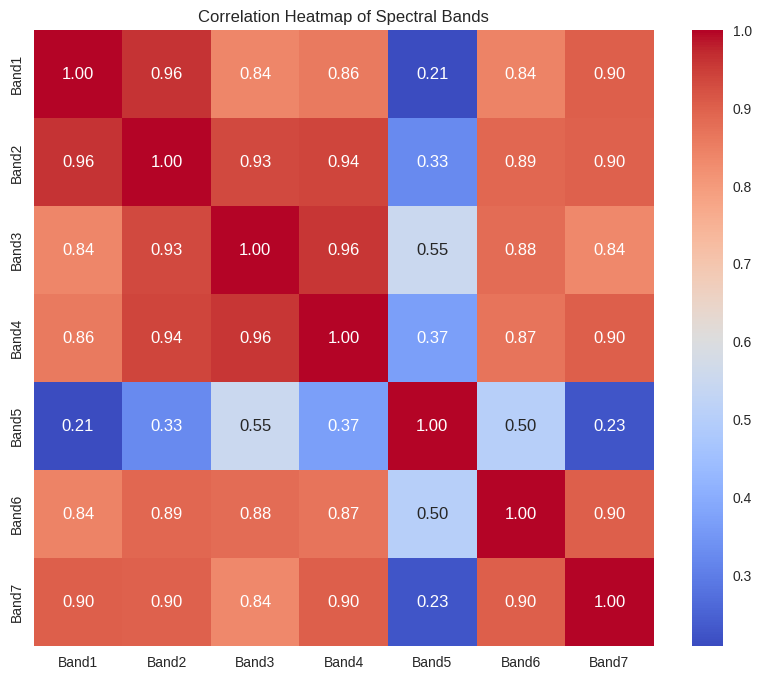

In [ ]:
correlation_matrix = input_data[bands].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Spectral Bands')
plt.show()

In [ ]:
# Compute the Iron Oxide Index (IOI)
input_data['IOI'] = (input_data['Band3'] - input_data['Band1']) / (input_data['Band3'] + input_data['Band1'])

# Define a threshold for mineralization
threshold = input_data['IOI'].quantile(0.8)  # Top 20% threshold

# Derive the target variable
input_data['Mineralization'] = (input_data['IOI'] > threshold).astype(int)  # 1 = Mineralization, 0 = Non-Mineralization

# Check the data
print(input_data[['IOI', 'Mineralization']].head())


        IOI  Mineralization
0  0.317604               0
1  0.260997               0
2  0.498221               1
3  0.567251               1
4  0.478652               1


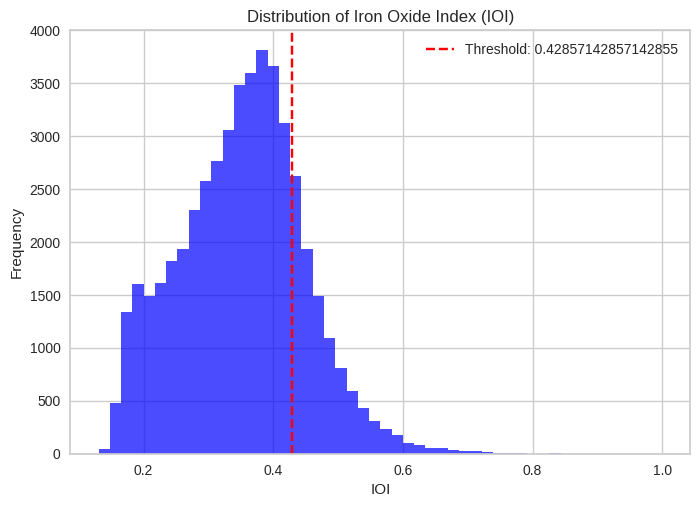

In [ ]:
import matplotlib.pyplot as plt
plt.hist(input_data['IOI'], bins=50, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')
plt.title('Distribution of Iron Oxide Index (IOI)')
plt.xlabel('IOI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = input_data.drop('Mineralization', axis=1)
y = input_data['Mineralization']  # targetvariable

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)



# Artificial Neural Network (ANN)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)

#model evaluation
print("kNN Accuracy:", accuracy_score(y_test, knn_pred))
print("ANN Accuracy:", accuracy_score(y_test, ann_pred))

kNN Accuracy: 0.8918116683725691
ANN Accuracy: 0.8705220061412487


       Unnamed: 0  Longitude   Latitude  Band1  Band2  Band3  Band4  Band5  \
2               2  27.564845 -25.105962    141    187    421    310   2263   
3               3  27.565143 -25.105961    111    170    402    291   2558   
4               4  27.565440 -25.105960    232    365    658    779   2409   
5               5  27.565738 -25.105959    257    395    675    927   1785   
6               6  27.566036 -25.105958    278    445    735   1015   1865   
...           ...        ...        ...    ...    ...    ...    ...    ...   
48631       48631  27.584406 -25.152214    236    382    643    946   1579   
48632       48632  27.584703 -25.152213    204    312    518    698   1499   
48735       48735  27.615361 -25.152088    298    364    755    920   1663   
48737       48737  27.615956 -25.152086    204    305    550    704   1373   
48757       48757  27.621909 -25.152061    119    173    306    283   1492   

       Band6  Band7       IOI  Mineralization  
2        947   

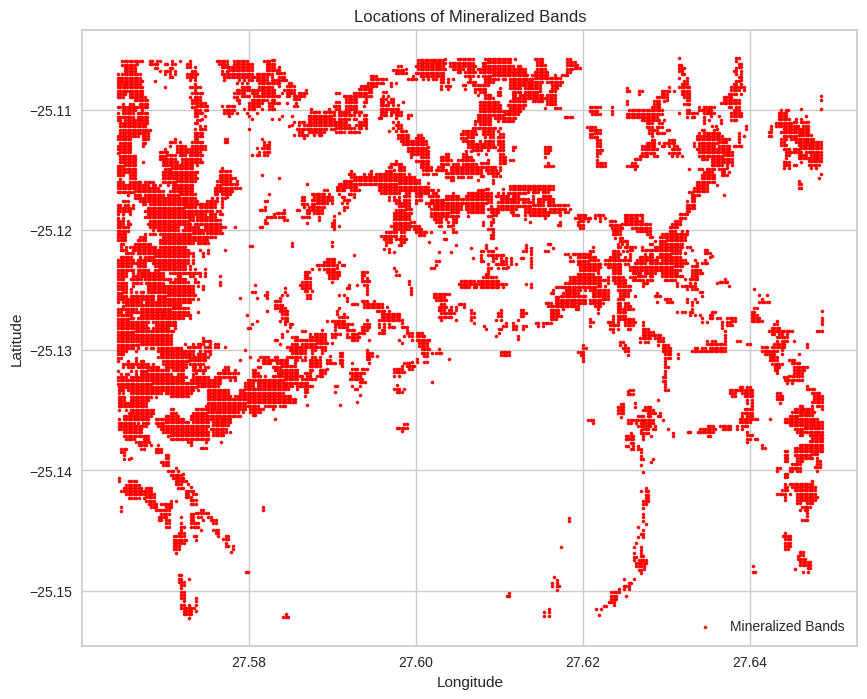

In [ ]:
mineralized_bands = input_data[input_data['Mineralization'] == 1]

# Display information about the mineralized bands.
print(mineralized_bands)

# Create a plot to visualize the locations of mineralized bands.
plt.figure(figsize=(10, 8))
plt.scatter(mineralized_bands['Longitude'], mineralized_bands['Latitude'], label='Mineralized Bands', s=5, c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of Mineralized Bands')
plt.legend()
plt.grid(True)
plt.show()